## Imagens Coloridas

Como já vimos, as imagens manipuladas pelo `scikit-image` são simplesmente arrays do Numpy. Consequentemente, uma grande parte das operações sobre as imagens consistem do uso das funcionalidades do Numpy.

As imagens coloridas seguem este mesmo conceito: são arrays do Numpy, mas com uma dimensão adicional para os canais:

In [1]:
%matplotlib inline

In [2]:
from skimage import data
cat = data.chelsea()
type(cat)

numpy.ndarray

In [3]:
cat.shape

(300, 451, 3)

Isto mostra que `cat` é um imagem com 300x451 pixels, com três canais (vermelho, verde e azul). 
Como antes, podemos acessar e definir os valores dos pixels:

In [4]:
cat[10,20]

array([151, 129, 115], dtype=uint8)

In [5]:
# Definição do pixel na linha 50, coluna 60 como "black"
cat[50,60] = 0

In [6]:
# Definição do pixel na linha 50, coluna 61 como "green"
cat[50,61] = [0,255,0] # [r, g, b]

Nós também podemos utilizar máscaras booleanas 2D para uma imagem colorida 2D, como fizemos para imagens de nível de cinza:

Utilizando uma máscara 2D em uma imagem colorida 2D

In [7]:
import matplotlib.pyplot as plt

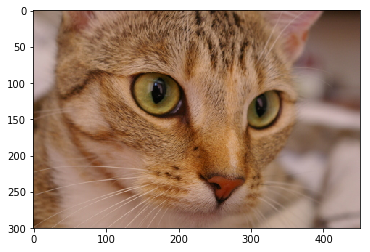

In [8]:
cat = data.chelsea()
plt.imshow(cat)

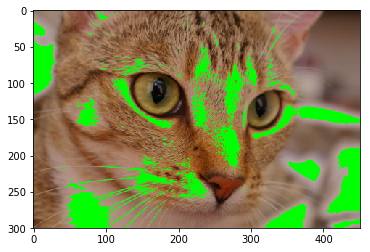

In [9]:
cat = data.chelsea()
reddish = cat[:,:,0] > 180
cat[reddish] = [0,255,0]
plt.imshow(cat)

In [10]:
cat.shape

(300, 451, 3)

In [11]:
reddish.shape

(300, 451)

In [12]:
import skimage.color

In [13]:
cat_orig = data.chelsea()
cat_hsv = skimage.color.convert_colorspace(cat_orig,"RGB","HSV")
cat_g = skimage.color.rgb2gray(cat_orig)

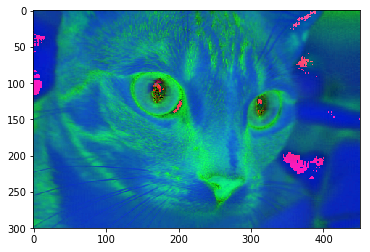

In [14]:
plt.imshow(cat_hsv, cmap = 'hsv')

In [15]:
cat_orig[50,60],cat_hsv[50,60],cat_g[50,60]

(array([160, 118,  78], dtype=uint8),
 array([0.08130081, 0.5125    , 0.62745098]),
 0.48643529411764713)

In [16]:
cat_orig[1:3,1:3,:]

array([[[145, 122, 106],
        [143, 120, 104]],

       [[147, 125, 111],
        [146, 122, 109]]], dtype=uint8)

In [17]:
cat_orig[1:3,1:3,:] / 255

array([[[0.56862745, 0.47843137, 0.41568627],
        [0.56078431, 0.47058824, 0.40784314]],

       [[0.57647059, 0.49019608, 0.43529412],
        [0.57254902, 0.47843137, 0.42745098]]])

## Exercícios

1. Utilize duas imagens coloridas diferentes e refaça os processamentos que fizemos nos notebooks anteriores para explorar os conceitos de imagens coloridas. As imagens devem estar no espaço de cores RGB para estas operações.

    a. Transformações de Intensidade (equalização e normalização)

    b. Filtros Espaciais (filtro de suavização e de aguçamento)

    c. Filtros de Frequência (filtro passa baixa Butterworth e filtro passa-alta Gaussiano)
    
    Para cada processamento, documente os resultados obtidos, indicando se são coerentes ou não.

2. Utilize a função `skimage.color.convert_colorspace` e explore os processamentos nos espaços de cor "RGB" e "HSV". Repita os processamentos da questão 1.

3. Compare os resultados dos processamentos feitos no espaço de cor 'RGB' e 'HSV' e com as imagens convertidas para *nível de cinza*. Explique os resultados obtidos.

### Exercício de implementação

Implemente uma função de conversão de espaço de cor RGB para HSV conforme apresentado no livro texto (Gonzalez & Woods, capítulo 6.) Compare (demonstre) o resultado da sua função com as funções da biblioteca `skimage.color.convert_colorspace`

In [18]:
def fHistograma(im, nbr_bins = 256):
    imhist, bins = np.histogram(im.flatten(), nbr_bins,normed = True)
    
    Pr = imhist.cumsum()

    Sk = ((nbr_bins - 1) / (im.shape[0]*im.shape[1])) * Pr
    
    # Interpolação para encontrar os novos valores dos pixels
    im2 = np.interp(im.flatten(), bins[:-1], Pr)
    
    return im2.reshape(im.shape), Pr

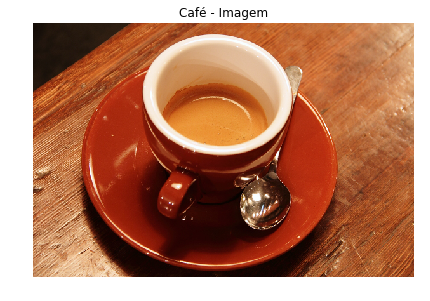

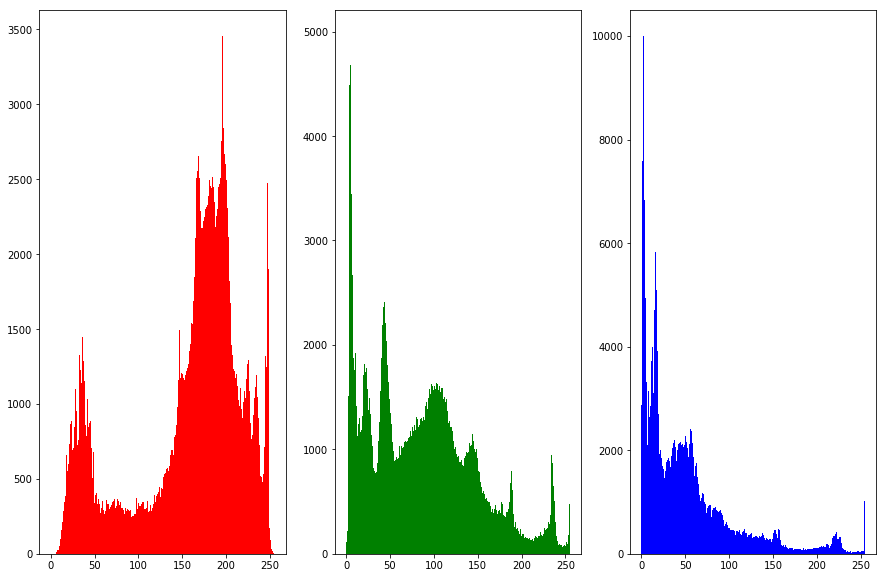

In [19]:
import numpy as np
from pylab import rcParams

cafe = data.coffee()
rcParams['figure.figsize'] = 15, 10
plt.figure()
plt.subplot(121)
plt.imshow(cafe)
plt.title('Café - Imagem')
plt.axis('off')
plt.show()

cafeEqVermelho, Pr = fHistograma(cafe[:,:,0])
cafeEqVerde, Pr = fHistograma(cafe[:,:,1])
cafeEqAzul, Pr = fHistograma(cafe[:,:,2])

cafeEq = np.copy(cafe)
cafeEq[:,:,0] = cafeEqVermelho * 256
cafeEq[:,:,1] = cafeEqVerde * 256
cafeEq[:,:,2] = cafeEqAzul * 256

plt.figure()
plt.subplot(131)
cafeHistogramaVermelho = plt.hist(cafe[:,:,0].flatten(), bins = 256 , color = 'red')

plt.subplot(132)
cafeHistogramaVerde = plt.hist(cafe[:,:,1].flatten(), bins = 256, color = 'green')

plt.subplot(133)
cafeHistogramaAzul = plt.hist(cafe[:,:,2].flatten(), bins = 256,  color = 'blue')

plt.show()

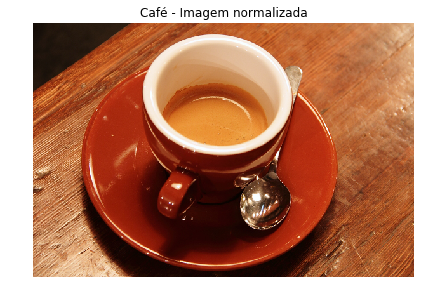

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


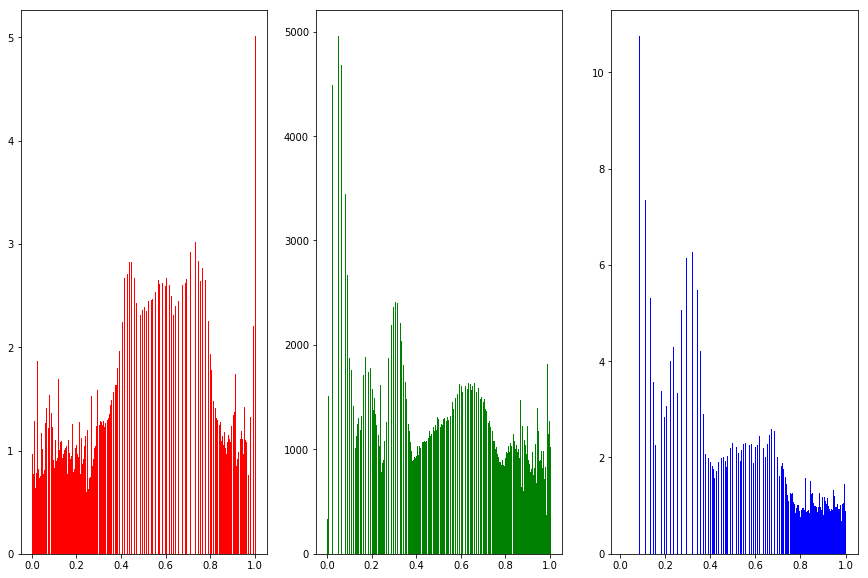

In [20]:
plt.figure()
plt.subplot(121)
plt.imshow(cafe) , plt.title('Café - Imagem normalizada'), plt.axis('off')
plt.show()

plt.figure()

plt.subplot(131)
cafeHistogramaVermelho = plt.hist(cafeEqVermelho.flatten(), normed = 1, bins=256 , color='red')

plt.subplot(132)
cafeHistorgramaVerde = plt.hist(cafeEqVerde.flatten(), bins = 256, color = 'green')

plt.subplot(133)
cafeHistogramaAzul = plt.hist(cafeEqAzul.flatten(), normed = 1, bins = 256,  color='blue')

plt.show()

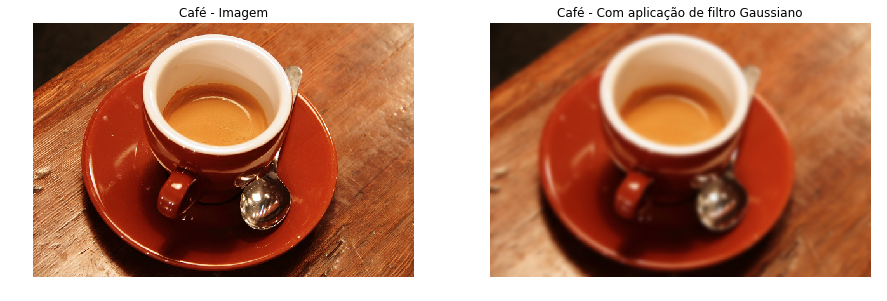

In [21]:
from skimage.filters import gaussian

cafe = data.coffee()

rcParams['figure.figsize'] = 15, 10
plt.figure()
plt.subplot(121)
plt.imshow(cafe), plt.title('Café - Imagem'), plt.axis('off')

# Borrando a imagem
gaussCafeVermelho = gaussian(cafe[:,:,0], sigma = 3, multichannel = False) 
gaussCafeVerde = gaussian(cafe[:,:,1], sigma = 3, multichannel = False)
gaussCafeAzul = gaussian(cafe[:,:,2], sigma = 3, multichannel = False)

gaussCafe = np.copy(cafe)
gaussCafe[:,:,0] = gaussCafeVermelho * 256
gaussCafe[:,:,1] = gaussCafeVerde * 256
gaussCafe[:,:,2] = gaussCafeAzul * 256

plt.subplot(122)
plt.imshow(gaussCafe)
plt.title('Café - Com aplicação de filtro Gaussiano')
plt.axis('off')

plt.show()

In [22]:
def fSobel(buffer):
    ws_h = [-1, -2, -1, 0, 0, 0, 1, 2, 1] 
    ws_v = [-1, 0, 1, -2 ,0 ,2 ,- 1, 0, 1] 
    return np.sqrt(((buffer * ws_h).sum()) ** 2 + ((buffer*ws_v).sum()) ** 2)

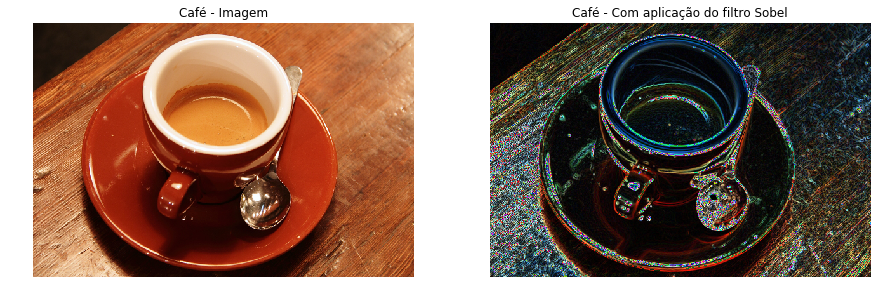

In [23]:
from scipy.ndimage import generic_filter

kernel = np.ones((3, 3), np.uint8)
cafe = data.coffee()

rcParams['figure.figsize'] = 15, 10
plt.figure()
plt.subplot(121)
plt.imshow(cafe)
plt.title('Café - Imagem')
plt.axis('off')

sobelCafeVermelho = generic_filter(cafe[:,:,0], function = fSobel, footprint = kernel)
sobelCafeVerde = generic_filter(cafe[:,:,1], function = fSobel, footprint = kernel)
sobelCafeAzul = generic_filter(cafe[:,:,2], function = fSobel, footprint = kernel)

sobelCafe = np.copy(cafe)
sobelCafe[:,:,0] = sobelCafeVermelho 
sobelCafe[:,:,1] = sobelCafeVerde 
sobelCafe[:,:,2] = sobelCafeAzul 

plt.subplot(122)
plt.imshow(sobelCafe)
plt.title('Café - Com aplicação do filtro Sobel')
plt.axis('off')
plt.show()

In [24]:
def fButter2dLP(shape, D0, n, pxd=1):
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    filt = 1 / (1.0 + (radius / D0)**(2*n))
    return filt

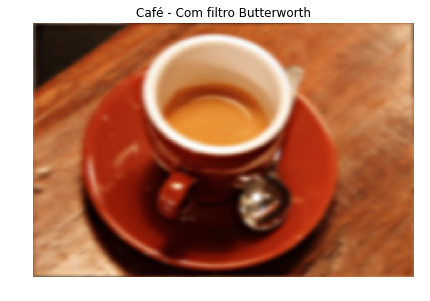

In [25]:
cafe = data.coffee()

fftVermelho = np.fft.fft2(cafe[:,:,0])
fshiftVermelho = np.fft.fftshift(fftVermelho)

fftVerde = np.fft.fft2(cafe[:,:,1])
fshiftVerde = np.fft.fftshift(fftVerde)

fftAzul = np.fft.fft2(cafe[:,:,2])
fshiftAzul = np.fft.fftshift(fftAzul)

filtBW = fButter2dLP(fftVermelho.shape, 30, 2)

fshiftVermelhoN = fshiftVermelho * filtBW
imagemBackBWVermelho = np.fft.ifft2(fshiftVermelhoN)
imagemBackBWVermelho = np.abs(imagemBackBWVermelho)

fshiftVerdeN = fshiftVerde * filtBW
imagemBackBWVerde = np.fft.ifft2(fshiftVerdeN)
imagemBackBWVerde = np.abs(imagemBackBWVerde)

fshiftAzulN = fshiftAzul * filtBW
imagemBackBWAzul = np.fft.ifft2(fshiftAzulN)
imagemBackBWAzul = np.abs(imagemBackBWAzul)

cafeBW = np.copy(cafe)
cafeBW[:,:,0] =  imagemBackBWVermelho
cafeBW[:,:,1] =  imagemBackBWVerde
cafeBW[:,:,2] =  imagemBackBWAzul

plt.subplot(122)
plt.imshow(cafeBW)
plt.title('Café - Com filtro Butterworth')
plt.axis('off')
plt.show()

In [26]:
def fGaussLP(shape, sigmax = 10,sigmay =10):
    nrows , ncols = shape
    cy, cx = nrows/2 , ncols/2
    x = np.linspace(0,nrows, nrows)
    y = np.linspace(0,ncols,ncols)
    X, Y = np.meshgrid(x,y)
    return np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))

def fGaussHP(shape, sigmax=10, sigmay=10):
    return 1 - fGaussLP(shape, sigmax, sigmay)

In [28]:
from skimage import io

cafe = io.imread('coffee.png')

fftVermelho = np.fft.fft2(cafe[:,:,0])
fshiftVermelho = np.fft.fftshift(fftVermelho)

fftVerde = np.fft.fft2(cafe[:,:,1])
fshiftVerde = np.fft.fftshift(fftVerde)

fftAzul = np.fft.fft2(cafe[:,:,2])
fshiftAzul = np.fft.fftshift(fftAzul)

gaussFilt = fGaussHP(fftVermelho.shape, 10, 10)

fshiftVermelhoN = fshiftVermelho * gaussFilt
imagemBackBWVermelho = np.fft.ifft2(fshiftVermelhoN)
imagemBackBWVermelho = np.abs(imagemBackBWVermelho)

fshiftVerdeN = fshiftVerde * gaussFilt
imagemBackBWVerde = np.fft.ifft2(fshiftVerdeN)
imagemBackBWVerde = np.abs(imagemBackBWVerde)

fshiftAzulN = fshiftAzul * gaussFilt
imagemBackBWAzul = np.fft.ifft2(fshiftAzulN)
imagemBackBWAzul = np.abs(img_back_bw_blue)

cafeBW = np.copy(cafe)
cafeBW[:,:,0] =  imagemBackBWVermelho
cafeBW[:,:,1] =  imagemBackBWVerde
cafeBW[:,:,2] =  imagemBackBWAzul

plt.subplot(122)
plt.imshow(cafeBW)
plt.title('Café - Com filtro Gaussiano')
plt.axis('off')
plt.show()

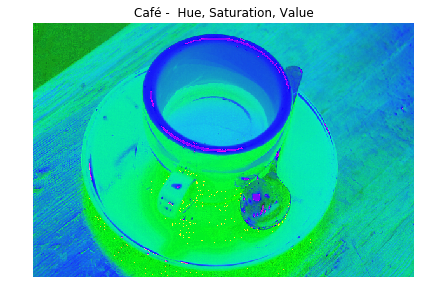

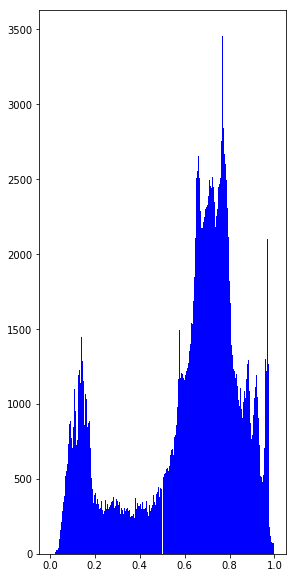

In [29]:
cafe = data.coffee()

cafeHSV = skimage.color.convert_colorspace(cafe,"RGB","HSV")

plt.subplot(121)
plt.imshow(cafeHSV)
plt.title('Café -  Hue, Saturation, Value')
plt.axis('off')
plt.show()

print()

cafeEqV, Pr = fHistograma(cafeHSV[:,:,2])

cafeEq = np.copy(cafeHSV)
cafeEq[:,:,2] = cafeEqV * 256

plt.figure()
plt.subplot(131)
cafeHistogramaAzul = plt.hist(cafeHSV[:,:,2].flatten(), bins = 256, color = 'blue')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


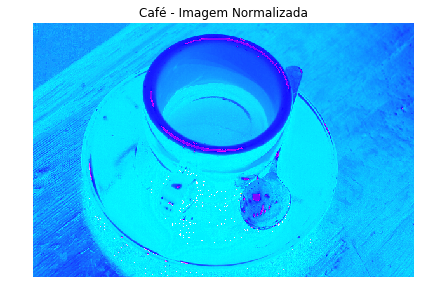

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


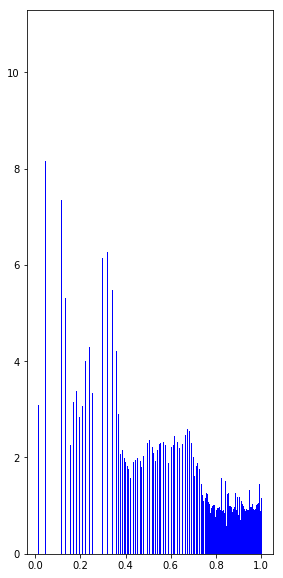

In [30]:
plt.figure()
plt.subplot(121)
plt.imshow(cafeEq)
plt.title('Café - Imagem Normalizada')
plt.axis('off')
plt.show()

plt.figure()
plt.subplot(131)
cafeHistogramaAzul = plt.hist(cafeEqAzul.flatten(), normed = 1, bins = 256, color = 'blue')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


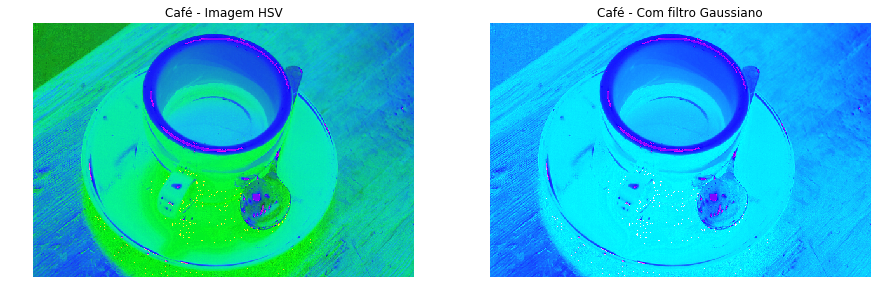

In [31]:
# Mais sigma = imagem mais borrada.
cafeValorGaussiano = gaussian(cafeHSV[:,:,2], sigma = 3, multichannel = False)

cafeGaussino = np.copy(cafeHSV)

cafeGaussino[:,:,2] = cafeValorGaussiano * 256

rcParams['figure.figsize'] = 15, 10
plt.figure()
plt.subplot(121)
plt.title('Café - Imagem HSV')
plt.axis('off')
plt.imshow(cafeHSV, cmap = 'hsv')

plt.subplot(122)
plt.imshow(cafeGaussino)
plt.title('Café - Com filtro Gaussiano')
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


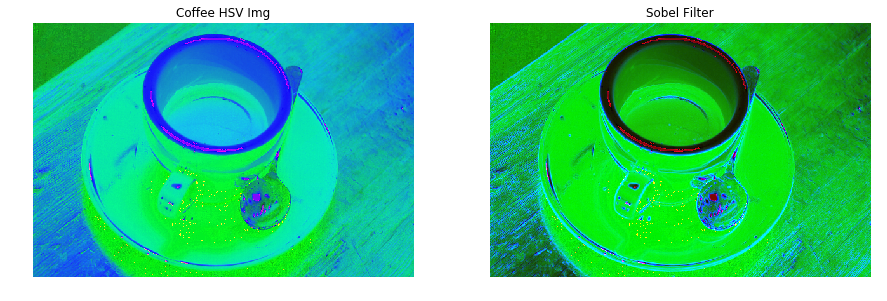

In [39]:
cafeValorSobel = generic_filter(cafeHSV[:,:,2], function = fSobel, footprint = kernel)

cafeSobel = np.copy(cafeHSV)
cafeSobel[:,:,2] = cafeValorSobel 

rcParams['figure.figsize'] = 15, 10
plt.figure()
plt.subplot(121)
plt.title('Coffee HSV Img')
plt.axis('off')
plt.imshow(cafeHSV)

plt.subplot(122)
plt.imshow(cafeSobel)
plt.title('Sobel Filter')
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


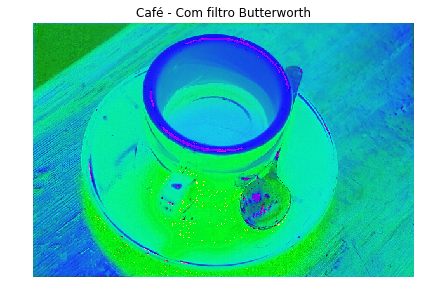

In [35]:
fftValor = np.fft.fft2(cafeHSV[:,:,2])
fshiftValor = np.fft.fftshift(fftValor)

filtBW = fButter2dLP(fftValor.shape, 30, 2)
fshiftValorN = fshiftValor * filtBW

imagemBackBWValor = np.fft.ifft2(fshiftValorN)
imagemBackBWValor = np.abs(imagemBackBWValor)

cafeBW = np.copy(cafeHSV)
cafeBW[:,:,2] =  imagemBackBWValor

plt.subplot(122)
plt.imshow(cafeBW)
plt.title('Café - Com filtro Butterworth')
plt.axis('off')

plt.show()

In [41]:
from skimage import io

cafe = io.imread('coffee.png')

cafeHSV = skimage.color.convert_colorspace(cafe,"RGB","HSV")

fftValor = np.fft.fft2(cafeHSV[:,:,2])
fshiftValor = np.fft.fftshift(fftValor)

gaussFilt = fGaussHP(fshiftValor.shape, 10, 10)

fshiftValorN = fshiftValor * gaussFilt
imagemBackBWValor = np.fft.ifft2(fshiftValorN)
imagemBackBWValor = np.abs(imagemBackBWValor)

cafeBW = np.copy(cafeHSV)
cafeBW[:,:,2] =  imagemBackBWValor

plt.subplot(122)
plt.imshow(imagemBackBWValor)
plt.title('Café - Com filtro Gaussiano')
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'coffee.png'